# Problem 1: Minotaur Maze

Done by: 
- Benet Ramió i Comas (20031026T177)
- Laura Sola Garcia (20031119T225)

This file contains the contains the code to run the experiments and the analysis of the results of the Minotaur Maze problem.
The script 'problem1.py' of all the classes, methods and functions needed.

In [ ]:
from problem_1 import *

### Dynamic Programming

In [2]:
import matplotlib.patches as patches

def static_solution_with_arrows(maze, path):
    """
    Generates a static visualization of the maze with arrows showing the path of the person and the Minotaur.

    Args:
        maze (np.array): 2D array representing the maze.
        path (list): List of tuples representing the sequence of positions for the person and the Minotaur.
                     Each element is a tuple ((person_row, person_col), (minotaur_row, minotaur_col)).
    """

    # Map a color to each cell in the maze
    col_map = {0: "white", 1: "black", 2: "lightgreen", -1: "lightcoral", -2: "lightpurple", 3: "bisque"}
    
    rows, cols = maze.shape
    fig, ax = plt.subplots(figsize=(cols, rows))

    # Flip the maze vertically for correct visualization
    flipped_maze = np.flipud(maze)

    # Draw the maze
    for r in range(rows):
        for c in range(cols):
            cell_color = col_map[flipped_maze[r, c]]
            ax.add_patch(patches.Rectangle((c, r), 1, 1, facecolor=cell_color, edgecolor="gray"))

    # Add arrows for the person's and Minotaur's paths
    for i in range(1, 15):
        # Extract positions of person and Minotaur
        person_start = path[i - 1][0]
        minotaur_start = path[i - 1][1]
        person_end = path[i][0]
        minotaur_end = path[i][1]

        # Adjust row coordinates to match flipped maze
        person_start = (rows - 1 - person_start[0], person_start[1])
        minotaur_start = (rows - 1 - minotaur_start[0], minotaur_start[1])
        person_end = (rows - 1 - person_end[0], person_end[1])
        minotaur_end = (rows - 1 - minotaur_end[0], minotaur_end[1])

        # Draw arrow for the person's movement
        ax.arrow(
            person_start[1] + 0.5, person_start[0] + 0.5,
            person_end[1] - person_start[1], person_end[0] - person_start[0],
            head_width=0.2, head_length=0.2, fc="blue", ec="blue", linewidth=1
        )

        # Draw arrow for the Minotaur's movement
        #ax.arrow(
        #    minotaur_start[1] + 0.5, minotaur_start[0] + 0.5,
        #    minotaur_end[1] - minotaur_start[1], minotaur_end[0] - minotaur_start[0],
        #    head_width=0.2, head_length=0.2, fc="red", ec="red", linewidth=1
        #)
    ax.arrow(
            6 + 0.5, 0.5,
            -1, 0,
            head_width=0.2, head_length=0.2, fc="blue", ec="blue", linewidth=1
    )
    # Adjust the aspect ratio
    ax.set_aspect("equal")
    ax.set_xticks(range(cols))
    ax.set_yticks(range(rows))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    #plt.gca().invert_yaxis()

    # Display the static solution
    plt.title("Static Solution with Arrows")
    plt.show()


In [4]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]])
# With the convention 0 = empty cell, 1 = obstacle, 2 = exit of the Maze

env = Maze_NoKeys(maze) # Create an environment maze


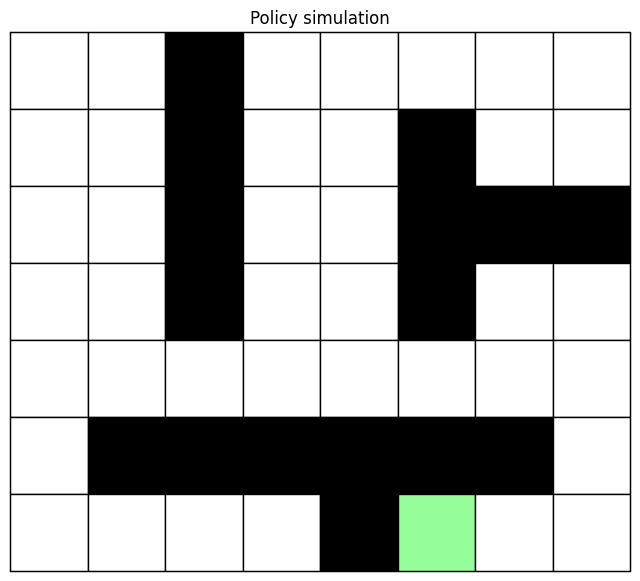

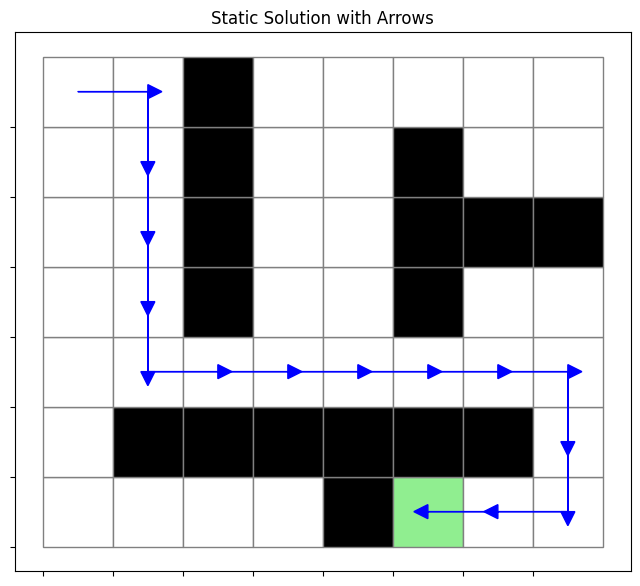

In [ ]:

# Solve the MDP problem with dynamic programming
V, policy = dynamic_programming(env, 15)  


method = 'DynProg'
start  = ((0,0), (6,5))
path = env.simulate(start, policy, method)[0]



animate_solution(maze, path)

static_solution_with_arrows(maze, path)

In [ ]:
env_stay = Maze_NoKeys(maze, stay=True) # Create an environment maze

n_alive_stay = [0 for i in range(31)]
n_alive_no_stay = [0 for i in range(31)]

method = 'DynProg'
start  = ((0,0), (6,5))    

for horizon in range(0,31):

    # Solve the MDP problem with dynamic programming
    V_no_stay, policy_no_stay = dynamic_programming(env, horizon)
    V_stay, policy_stay = dynamic_programming(env_stay, horizon)


    for sim in range(10000):
        # Simulate the shortest path starting from position A
        path_no_stay = env.simulate(start, policy_no_stay, method)[0]
        path_stay = env_stay.simulate(start, policy_stay, method)[0]

        if path_no_stay[-1] == 'Win':
            n_alive_no_stay[horizon]+=1

        if path_stay[-1] == 'Win':
            n_alive_stay[horizon]+=1


prob_no_stay = [n_aliv/1000 for n_aliv in n_alive_no_stay]
prob_stay = [n_aliv/1000 for n_aliv in n_alive_stay]

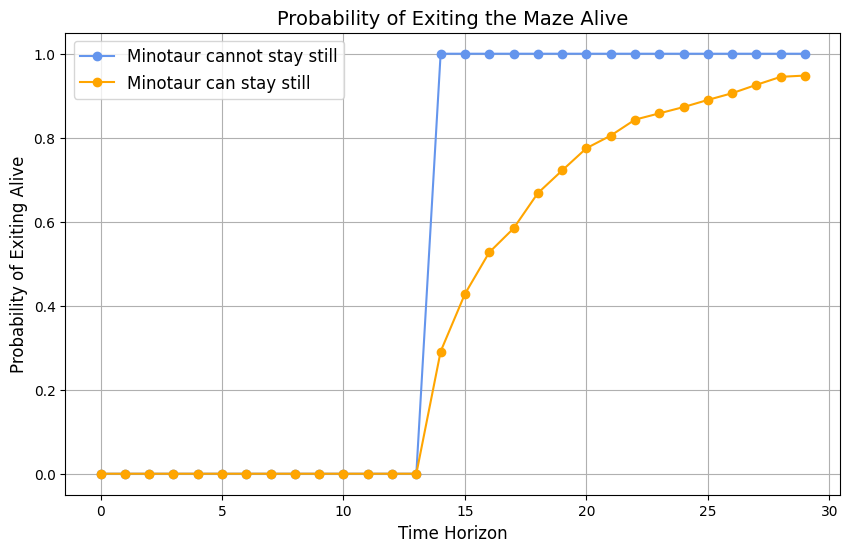

In [17]:
# Example data for the two cases
time_horizon = np.arange(0, 30)  # Time horizon from 1 to 30

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(time_horizon, prob_no_stay, marker='o', label='Minotaur cannot stay still', linestyle='-', color='cornflowerblue')
plt.plot(time_horizon, prob_stay, marker='o', label='Minotaur can stay still', linestyle='-', color='orange')

# Add labels, title, and legend
plt.title('Probability of Exiting the Maze Alive', fontsize=14)
plt.xlabel('Time Horizon', fontsize=12)
plt.ylabel('Probability of Exiting Alive', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

### Value Iteration

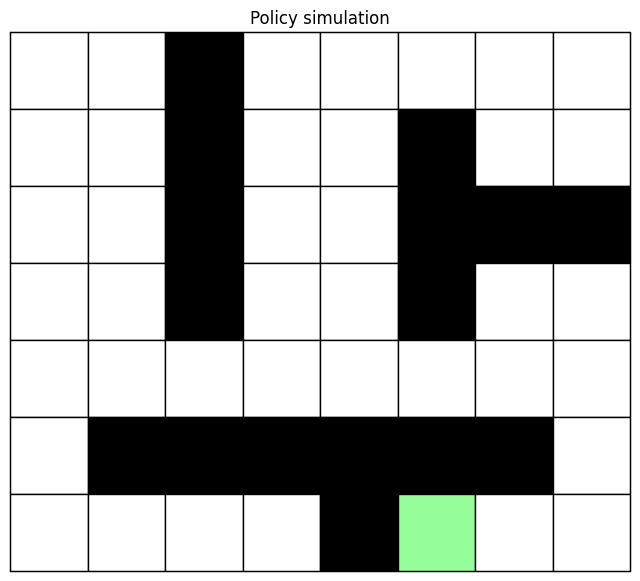

In [4]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]])
# With the convention 0 = empty cell, 1 = obstacle, 2 = exit of the Maze

env = Maze_NoKeys(maze) # Create an environment maze
gamma = 29/30
epsilon = 0.0000001

# Solve the MDP problem with dynamic programming
V, policy = value_iteration(env, gamma, epsilon)

# Simulate the shortest path starting from position A
method = 'ValIter'
start  = ((0,0), (6,5)) # Initial state
path = env.simulate(start, policy, method)[0]

animate_solution(maze, path)

In [ ]:
method = 'ValIter'
start  = ((0,0), (6,5)) # Initial state

n_alive = 0
n_horizon_more_15 = 0

for sim in range(10000):
    # Simulate the shortest path starting from position A
    sim = env.simulate(start, policy, method)
    if sim[1]>=15: # If the horizon is greater than 15
        n_horizon_more_15+=1

    if sim[0][-1] == 'Win':
        n_alive+=1

print("Probability of exiting the maze alive: ", n_alive/10000)
print("Probability of exiting the maze alive with horizon > 15: ", n_alive/n_horizon_more_15)

Probability of exiting the maze alive:  0.6032
Probability of exiting the maze alive with horizon > 15:  1.0


### Q-Learning and Sarsa

General configuration for the experiments

In [2]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 3],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]])
# With the convention 0 = empty cell, 1 = obstacle, 2 = exit of the Maze, 3 = key

start  = ((0,0), (6,5), False) # Start from the initial position

In [2]:
# Optimal value at the initial state for the given reward structure
lam = 49/50
V_opt = 1*lam**15 + 10*lam**29
print('Optimal value at the initial state:', V_opt)

Optimal value at the initial state: 6.304735626955985


#### (i) Q-learning

Initialization: 0
Episode: 0 Value: 0.0
Episode: 5000 Value: 0.24505990200964758
Episode: 10000 Value: 0.4981617635465228
Episode: 15000 Value: 0.6568182788733455
Episode: 20000 Value: 0.9499222271859277
Episode: 25000 Value: 1.4274823398833842
Episode: 30000 Value: 1.9845738815590392
Episode: 35000 Value: 2.546945974903836
Episode: 40000 Value: 3.048804352062183
Episode: 45000 Value: 3.487088692112959
Initialization: 1
Episode: 0 Value: 1.0
Episode: 5000 Value: 0.98
Episode: 10000 Value: 1.1498686607009232
Episode: 15000 Value: 1.3026669172915812
Episode: 20000 Value: 1.647758490481801
Episode: 25000 Value: 2.30222359574997
Episode: 30000 Value: 2.9591859838010452
Episode: 35000 Value: 3.5153245081580193
Episode: 40000 Value: 3.959493703272655
Episode: 45000 Value: 4.3055581264264635
Initialization: rand
Episode: 0 Value: 0.9760817490600155
Episode: 5000 Value: 0.9315228131978944
Episode: 10000 Value: 0.9291654955268629
Episode: 15000 Value: 0.9286487085735717
Episode: 20000 Value: 0.

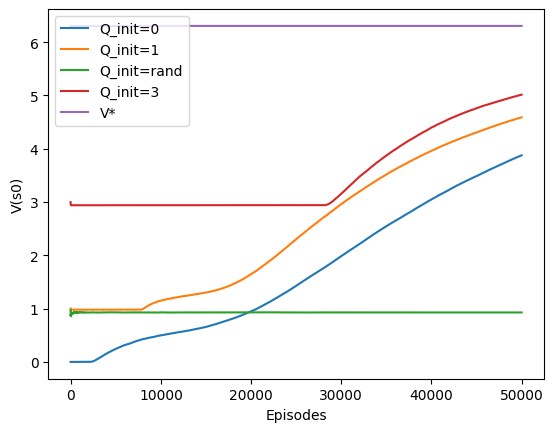

In [ ]:
### Q learning algorithm, initialization comparison
ini_time = time.time()

# Parameters
epsilon=0.2
discount_factor=49/50
alpha=2/3
num_episodes = 50000
algorithm = 'Q_learning'
inits = ['0', '1', 'rand', '3']
v_values_init = []
for init in inits:
    print('Initialization:', init)
    policy, v_values = train_agent(RL_agent, maze, start, algorithm, epsilon, discount_factor, alpha, num_episodes, init)
    v_values_init.append(v_values)


plt.figure()
for i in range(len(inits)):
    plt.plot(v_values_init[i], label='Q_init=' + inits[i])

plt.plot([V_opt]*num_episodes, label='V*')

plt.legend()
plt.xlabel('Episodes')
plt.ylabel('V(s0)')
# plt.savefig('figs/qi_Q_learning_init.png')

print('Time:', time.time()-ini_time)

Epsilon: 0.01
Episode: 0 Value: 1.0
Episode: 5000 Value: 0.98
Episode: 10000 Value: 1.163687333450257
Episode: 15000 Value: 1.4167788643914356
Episode: 20000 Value: 1.7085782463419048
Episode: 25000 Value: 1.9763118759928344
Episode: 30000 Value: 2.2440501525450105
Episode: 35000 Value: 2.490317725704406
Episode: 40000 Value: 2.7083758488231955
Episode: 45000 Value: 2.8972174447612145
Epsilon: 0.1
Episode: 0 Value: 1.0
Episode: 5000 Value: 0.9800651294820518
Episode: 10000 Value: 1.30337748457296
Episode: 15000 Value: 1.8123117649027465
Episode: 20000 Value: 2.4652284532298445
Episode: 25000 Value: 3.0491736534316867
Episode: 30000 Value: 3.492554653137259
Episode: 35000 Value: 3.8726300492219483
Episode: 40000 Value: 4.1731145882768415
Episode: 45000 Value: 4.42260925106443
Epsilon: 0.2
Episode: 0 Value: 1.0
Episode: 5000 Value: 0.98
Episode: 10000 Value: 1.2431634782383767
Episode: 15000 Value: 1.4207371744566817
Episode: 20000 Value: 1.8559849135784543
Episode: 25000 Value: 2.487569

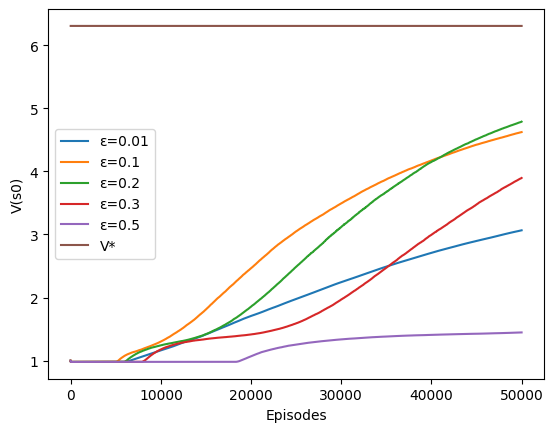

In [ ]:
### Q learning algorithm, epsilon comparison
ini_time = time.time()

# Parameters
epsilon_values = [0.01, 0.1, 0.2, 0.3, 0.5]
discount_factor=49/50
alpha=2/3
num_episodes = 50000
algorithm = 'Q_learning'
init = '1'

v_values_epsilon = []
for epsilon in epsilon_values:
    print('Epsilon:', epsilon)
    policy, v_values = train_agent(RL_agent, maze, start, algorithm, epsilon, discount_factor, alpha, num_episodes, init)
    v_values_epsilon.append(v_values)


plt.figure()
for i in range(len(epsilon_values)):
    plt.plot(v_values_epsilon[i], label='ε=' + str(epsilon_values[i]))

plt.plot([V_opt]*num_episodes, label='V*')

plt.legend()
plt.xlabel('Episodes')
plt.ylabel('V(s0)')
# plt.savefig('figs/qi_Q_learning_epsilon.png')

print('Time:', time.time()-ini_time)

Epsilon: 0.01
Episode: 0 Value: 3.0
Episode: 5000 Value: 2.94
Episode: 10000 Value: 2.94
Episode: 15000 Value: 2.94
Episode: 20000 Value: 3.3978753291306694
Episode: 25000 Value: 3.6966009511278486
Episode: 30000 Value: 3.913609691675363
Episode: 35000 Value: 4.073653380462307
Episode: 40000 Value: 4.204526787422492
Episode: 45000 Value: 4.307131376146404
Epsilon: 0.1
Episode: 0 Value: 3.0
Episode: 5000 Value: 2.94
Episode: 10000 Value: 2.94
Episode: 15000 Value: 2.94
Episode: 20000 Value: 3.3083542551596095
Episode: 25000 Value: 3.841458811866635
Episode: 30000 Value: 4.204348769188599
Episode: 35000 Value: 4.483122967377343
Episode: 40000 Value: 4.69957981907196
Episode: 45000 Value: 4.875178428047519
Epsilon: 0.2
Episode: 0 Value: 3.0
Episode: 5000 Value: 2.94
Episode: 10000 Value: 2.94
Episode: 15000 Value: 2.94
Episode: 20000 Value: 2.94
Episode: 25000 Value: 3.2933674904763457
Episode: 30000 Value: 3.7983129684414636
Episode: 35000 Value: 4.243016672151367
Episode: 40000 Value: 4

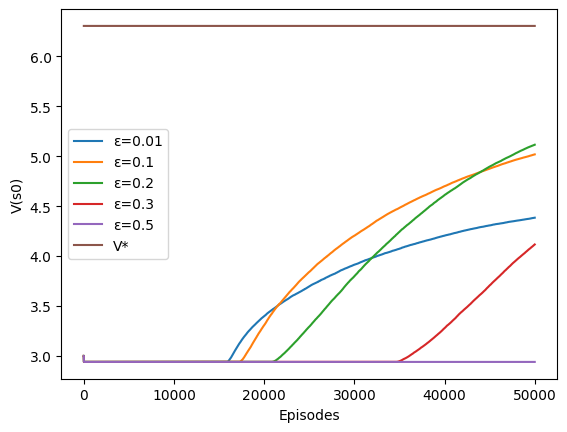

In [ ]:
### Q learning algorithm, epsilon comparison
ini_time = time.time()

# Parameters
epsilon_values = [0.01, 0.1, 0.2, 0.3, 0.5]
discount_factor=49/50
alpha=2/3
num_episodes = 50000
algorithm = 'Q_learning'
init = '3'

v_values_epsilon_3 = []
for epsilon in epsilon_values:
    print('Epsilon:', epsilon)
    policy, v_values = train_agent(RL_agent, maze, start, algorithm, epsilon, discount_factor, alpha, num_episodes, init)
    v_values_epsilon_3.append(v_values)


plt.figure()
for i in range(len(epsilon_values)):
    plt.plot(v_values_epsilon_3[i], label='ε=' + str(epsilon_values[i]))

plt.plot([V_opt]*num_episodes, label='V*')

plt.legend()
plt.xlabel('Episodes')
plt.ylabel('V(s0)')
# plt.savefig('figs/qi_Q_learning_epsilon_3.png')

print('Time:', time.time()-ini_time)

Alpha: 0.55
Episode: 0 Value: 0.98
Episode: 5000 Value: 1.0340416450720866
Episode: 10000 Value: 1.9202891688844068
Episode: 15000 Value: 3.9684298610484077
Episode: 20000 Value: 4.87193385510789
Episode: 25000 Value: 5.349944290298209
Episode: 30000 Value: 5.595336632992403
Episode: 35000 Value: 5.733431409926387
Episode: 40000 Value: 5.82577705555739
Episode: 45000 Value: 5.891657584873447
Alpha: 0.65
Episode: 0 Value: 1.0
Episode: 5000 Value: 0.98
Episode: 10000 Value: 1.2601746556923856
Episode: 15000 Value: 1.5158341577038341
Episode: 20000 Value: 2.084751320271895
Episode: 25000 Value: 2.7911975487599623
Episode: 30000 Value: 3.4384985892427524
Episode: 35000 Value: 3.943102667879059
Episode: 40000 Value: 4.332506912731977
Episode: 45000 Value: 4.642729845999282
Alpha: 0.75
Episode: 0 Value: 1.0
Episode: 5000 Value: 0.98
Episode: 10000 Value: 0.98
Episode: 15000 Value: 1.1388781311732625
Episode: 20000 Value: 1.2474268711450702
Episode: 25000 Value: 1.3187193038318963
Episode: 30

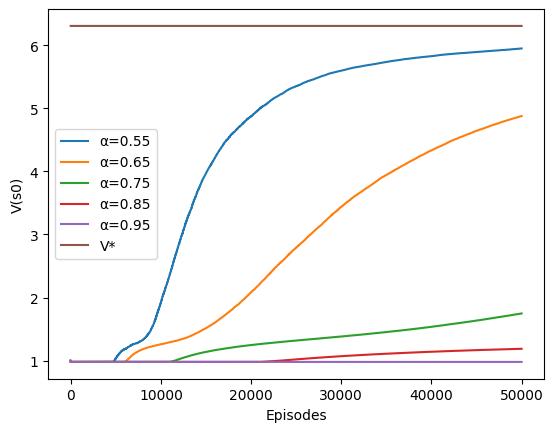

In [ ]:
### Q learning algorithm, alpha comparison
ini_time = time.time()

# Parameters
epsilon=0.2
discount_factor=49/50
alpha_values = [0.55, 0.65, 0.75, 0.85, 0.95]
num_episodes = 50000
algorithm = 'Q_learning'
init = '1'

v_values_alpha = []
for alpha in alpha_values:
    print('Alpha:', alpha)
    policy, v_values = train_agent(RL_agent, maze, start, algorithm, epsilon, discount_factor, alpha, num_episodes, init)
    v_values_alpha.append(v_values)


plt.figure()
for i in range(len(alpha_values)):
    plt.plot(v_values_alpha[i], label='α=' + str(alpha_values[i]))

plt.plot([V_opt]*num_episodes, label='V*')

plt.legend()

plt.xlabel('Episodes')
plt.ylabel('V(s0)')
# plt.savefig('figs/qi_Q_learning_alpha.png')

print('Time:', time.time()-ini_time)

Alpha: 0.55
Episode: 0 Value: 3.0
Episode: 5000 Value: 2.94
Episode: 10000 Value: 2.94
Episode: 15000 Value: 2.94
Episode: 20000 Value: 4.1783755281994255
Episode: 25000 Value: 4.909911387787021
Episode: 30000 Value: 5.370560222583926
Episode: 35000 Value: 5.6240886947204585
Episode: 40000 Value: 5.791679073789102
Episode: 45000 Value: 5.891355553566694
Alpha: 0.65
Episode: 0 Value: 3.0
Episode: 5000 Value: 2.94
Episode: 10000 Value: 2.94
Episode: 15000 Value: 2.94
Episode: 20000 Value: 2.956527846554202
Episode: 25000 Value: 3.5833203352461194
Episode: 30000 Value: 4.076572431797233
Episode: 35000 Value: 4.471637801396427
Episode: 40000 Value: 4.78648878773555
Episode: 45000 Value: 5.029977251781156
Alpha: 0.75
Episode: 0 Value: 3.0
Episode: 5000 Value: 2.94
Episode: 10000 Value: 2.94
Episode: 15000 Value: 2.94
Episode: 20000 Value: 2.94
Episode: 25000 Value: 2.94
Episode: 30000 Value: 2.94
Episode: 35000 Value: 2.94
Episode: 40000 Value: 2.94
Episode: 45000 Value: 2.94
Alpha: 0.85
Ep

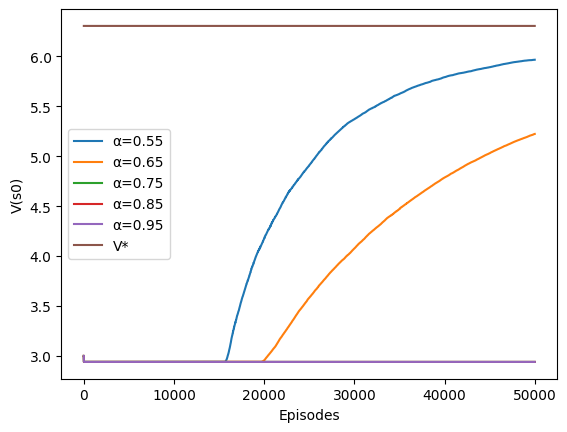

In [ ]:
### Q learning algorithm, alpha comparison
ini_time = time.time()

# Parameters
epsilon=0.2
discount_factor=49/50
alpha_values = [0.55, 0.65, 0.75, 0.85, 0.95]
num_episodes = 50000
algorithm = 'Q_learning'
init = '3'

v_values_alpha_3 = []
for alpha in alpha_values:
    print('Alpha:', alpha)
    policy, v_values = train_agent(RL_agent, maze, start, algorithm, epsilon, discount_factor, alpha, num_episodes, init)
    v_values_alpha_3.append(v_values)


plt.figure()
for i in range(len(alpha_values)):
    plt.plot(v_values_alpha_3[i], label='α=' + str(alpha_values[i]))

plt.plot([V_opt]*num_episodes, label='V*')

plt.legend()

plt.xlabel('Episodes')
plt.ylabel('V(s0)')
# plt.savefig('figs/qi_Q_learning_alpha_3.png')

print('Time:', time.time()-ini_time)

#### (j) SARSA

Initialization: 0
Epsilon: 0.2
Episode: 0 Value: 0.0
Episode: 5000 Value: -2.319412391244888
Episode: 10000 Value: -4.031305905682612
Episode: 15000 Value: -5.125023670852728
Episode: 20000 Value: -5.78588505603771
Episode: 25000 Value: -6.287885133757262
Episode: 30000 Value: -6.740869275255747
Episode: 35000 Value: -7.022437151147157
Episode: 40000 Value: -7.331053045625435
Episode: 45000 Value: -7.570246360515747
Epsilon: 0.3
Episode: 0 Value: 0.0
Episode: 5000 Value: -3.7113805466734817
Episode: 10000 Value: -6.179173451691637
Episode: 15000 Value: -7.681601677325686
Episode: 20000 Value: -8.830723980021174
Episode: 25000 Value: -9.617439420333698
Episode: 30000 Value: -10.308201504496006
Episode: 35000 Value: -10.812418229862143
Episode: 40000 Value: -11.301341681643523
Episode: 45000 Value: -11.752561635275054
Initialization: 1
Epsilon: 0.2
Episode: 0 Value: 1.0
Episode: 5000 Value: -1.6247517613668137
Episode: 10000 Value: -3.357535770852807
Episode: 15000 Value: -4.362400579965

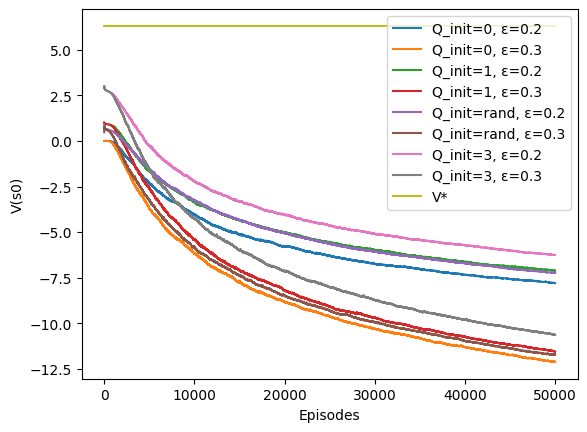

In [ ]:
### SARSA learning algorithm, initialization comparison with epsilon = 0.2 and 0.3
ini_time = time.time()

# Parameters
epsilons = [0.2, 0.3]
discount_factor=49/50
alpha=2/3
num_episodes = 50000
algorithm = 'SARSA'
inits = ['0', '1', 'rand', '3']
v_values_init = []
for init in inits:
    print('Initialization:', init)
    for epsilon in epsilons:
        print('Epsilon:', epsilon)
        policy, v_values = train_agent(RL_agent, maze, start, algorithm, epsilon, discount_factor, alpha, num_episodes, init)
        v_values_init.append(v_values)
# Ns si s'ha d'afegir el valor del Value iteration algorithm

v_values_init.append([V_opt]*num_episodes)

plt.figure()
k = 0
for i in range(len(inits)):
    for j in range(len(epsilons)):
        plt.plot(v_values_init[k], label='Q_init=' + inits[i] + ', ε=' + str(epsilons[j]))
        k += 1

plt.plot(v_values_init[-1], label='V*')

plt.legend()
plt.xlabel('Episodes')
plt.ylabel('V(s0)')
# plt.savefig('figs/qj_SARSA_ini_epsilon.png')

print('Time:', time.time()-ini_time)

Delta: 0.55
Alpha: 0.51
Episode: 0 Value: 1.0
Episode: 5000 Value: 0.05907908974570276
Episode: 10000 Value: 0.04216524239289492
Episode: 15000 Value: 0.20774279830461695
Episode: 20000 Value: 0.3091765414921464
Episode: 25000 Value: 0.44030173322113947
Episode: 30000 Value: 0.5473664051030716
Episode: 35000 Value: 0.6834191197771294
Episode: 40000 Value: 0.8066681778413115
Episode: 45000 Value: 0.9006902879785583
Alpha: 0.65
Episode: 0 Value: 1.0
Episode: 5000 Value: 0.5863762261273954
Episode: 10000 Value: 0.4361949486400996
Episode: 15000 Value: 0.49328518360608825
Episode: 20000 Value: 0.5862975803658577
Episode: 25000 Value: 0.67347805502528
Episode: 30000 Value: 0.7575568497064123
Episode: 35000 Value: 0.8477334905879703
Episode: 40000 Value: 0.9498849762687965
Episode: 45000 Value: 1.038561965474406
Alpha: 0.85
Episode: 0 Value: 1.0
Episode: 5000 Value: 0.8516532750876338
Episode: 10000 Value: 0.8149206813814776
Episode: 15000 Value: 0.7881918152244116
Episode: 20000 Value: 0.76

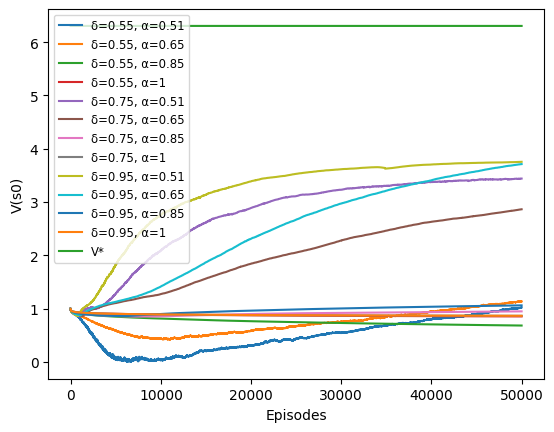

In [ ]:
### SARSA learning algorithm, alpha delta comparison with initialization = 1
ini_time = time.time()

# Parameters
epsilon = None
discount_factor=49/50
alphas = [0.51, 0.65, 0.85, 1]
num_episodes = 50000
algorithm = 'SARSA'
init = '1'
deltas = [0.55, 0.75, 0.95]
v_values_exploration = []
for delta in deltas:
    print('Delta:', delta)
    for alpha in alphas:
        print('Alpha:', alpha)
        policy, v_values = train_agent(RL_agent, maze, start, algorithm, epsilon, discount_factor, alpha, num_episodes, init, delta)
        v_values_exploration.append(v_values)

v_values_exploration.append([V_opt]*num_episodes)

plt.figure()
k = 0
for i in range(len(deltas)):
    for j in range(len(alphas)):
        plt.plot(v_values_exploration[k], label='δ=' + str(deltas[i]) + ', α=' + str(alphas[j]))
        k += 1

plt.plot(v_values_exploration[-1], label='V*')

#topleft and small font
plt.legend(loc='upper left', fontsize='small')
plt.xlabel('Episodes')
plt.ylabel('V(s0)')
# save the plot in the figures folder
# plt.savefig('figs/qj_SARSA_delta_alpha.png')

print('Time:', time.time()-ini_time)

Delta: 0.55
Alpha: 0.51
Episode: 0 Value: 3.0
Episode: 5000 Value: 1.3979487359709257
Episode: 10000 Value: 1.1482362128783847
Episode: 15000 Value: 1.1478982057652838
Episode: 20000 Value: 1.2025735003169014
Episode: 25000 Value: 1.298444801234136
Episode: 30000 Value: 1.3517382740707313
Episode: 35000 Value: 1.4176370863146261
Episode: 40000 Value: 1.4725053101024819
Episode: 45000 Value: 1.5399690794174632
Alpha: 0.65
Episode: 0 Value: 3.0
Episode: 5000 Value: 2.0719830565583024
Episode: 10000 Value: 1.6798377574180219
Episode: 15000 Value: 1.524695929870909
Episode: 20000 Value: 1.432368943235288
Episode: 25000 Value: 1.448864227384837
Episode: 30000 Value: 1.421297464737302
Episode: 35000 Value: 1.4532153731650808
Episode: 40000 Value: 1.4749542467468075
Episode: 45000 Value: 1.5016035994029868
Alpha: 0.85
Episode: 0 Value: 3.0
Episode: 5000 Value: 2.550561309474218
Episode: 10000 Value: 2.4421555253276765
Episode: 15000 Value: 2.3689126750059475
Episode: 20000 Value: 2.3147458347

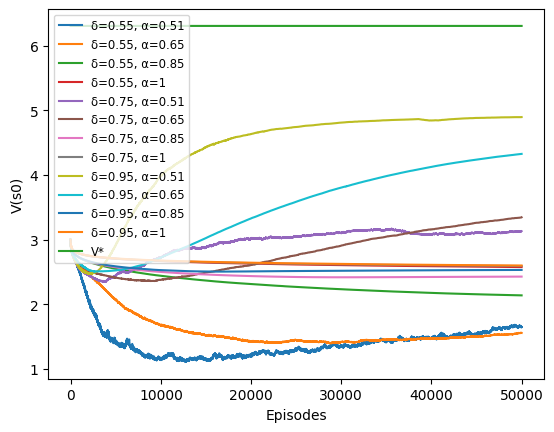

In [ ]:
### SARSA learning algorithm, alpha delta comparison with initialization = 3
ini_time = time.time()

# Parameters
epsilon = None
discount_factor=49/50
alphas = [0.51, 0.65, 0.85, 1]
num_episodes = 50000
algorithm = 'SARSA'
init = '3'
deltas = [0.55, 0.75, 0.95]
v_values_exploration = []
for delta in deltas:
    print('Delta:', delta)
    for alpha in alphas:
        print('Alpha:', alpha)
        policy, v_values = train_agent(RL_agent, maze, start, algorithm, epsilon, discount_factor, alpha, num_episodes, init, delta)
        v_values_exploration.append(v_values)

v_values_exploration.append([V_opt]*num_episodes)

plt.figure()
k = 0
for i in range(len(deltas)):
    for j in range(len(alphas)):
        plt.plot(v_values_exploration[k], label='δ=' + str(deltas[i]) + ', α=' + str(alphas[j]))
        k += 1

plt.plot(v_values_exploration[-1], label='V*')

plt.legend(loc='upper left', fontsize='small')
plt.xlabel('Episodes')
plt.ylabel('V(s0)')
# save the plot in the figures folder
# plt.savefig('figs/qj_SARSA_delta_alpha_3.png')

print('Time:', time.time()-ini_time)

#### (k) Probability of leaving the maze alive

Use the best parameters of the Q-learning algorithm and SARSA algorithm to train the agent and simulate paths to compute the probability of reaching the 'Win' state before being eaten by the minotaur

In [4]:
# Use the best parameters of the Q-learning algorithm and SARSA algorithm to train the agent and simulate paths to compute the probability of reaching the 'Win' state before being eaten by the minotaur

# Q-learning algorithm
epsilon = 0.2
discount_factor = 49/50
alpha = 0.55
init = '3'
num_episodes = 50000
algorithm = 'Q_learning'

policy_q, v_values_q = train_agent(RL_agent, maze, start, algorithm, epsilon, discount_factor, alpha, num_episodes, init)

Episode: 0 Value: 3.0
Episode: 5000 Value: 2.94
Episode: 10000 Value: 2.94
Episode: 15000 Value: 2.94
Episode: 20000 Value: 4.1783755281994255
Episode: 25000 Value: 4.909911387787021
Episode: 30000 Value: 5.370560222583926
Episode: 35000 Value: 5.6240886947204585
Episode: 40000 Value: 5.791679073789102
Episode: 45000 Value: 5.891355553566694


In [5]:
# SARSA algorithm

# Parameters
epsilon = None
discount_factor=49/50
alpha = 0.51
num_episodes = 50000
algorithm = 'SARSA'
init = '3'
delta = 0.95

policy_s, v_values_q = train_agent(RL_agent, maze, start, algorithm, epsilon, discount_factor, alpha, num_episodes, init, delta)


Episode: 0 Value: 3.0
Episode: 5000 Value: 3.049461812693949
Episode: 10000 Value: 3.7550055454495213
Episode: 15000 Value: 4.135435386065777
Episode: 20000 Value: 4.315193066772666
Episode: 25000 Value: 4.381775897419349
Episode: 30000 Value: 4.432328231007345
Episode: 35000 Value: 4.460770820446586
Episode: 40000 Value: 4.483736069520756
Episode: 45000 Value: 4.494062272013584


In [6]:
# simulate paths
env = Maze(maze)

simulations = 10000
count_q = 0
count_s = 0
for i in range(simulations):
    path_q, _ = env.simulate(start, policy_q, 'ValIter', mean=51)
    path_s, _ = env.simulate(start, policy_s, 'ValIter', mean=51)
    
    if path_q[-1] == 'Win':
        count_q += 1
    if path_s[-1] == 'Win':
        count_s += 1

print('Q-learning:', count_q/simulations)
print('SARSA:', count_s/simulations)

Q-learning: 0.5761
SARSA: 0.4196
